## Set Library Path

In [3]:
.libPaths("/share/korflab/home/viki/anaconda3/jupyter_nb/lib/R/library")

# Visualizing Run Times

In [4]:
library(ggplot2)
library(dplyr)
library(ggforce)

In [5]:
# Load data
data <- read.csv('run_times.csv')

In [6]:
# Convert time to hours
convert_time_to_hours <- function(time_str) {
  time_components <- unlist(strsplit(time_str, "[ms ]"))
  minutes <- as.numeric(time_components[1])
  seconds <- as.numeric(time_components[2])
  total_hours <- minutes / 60 + seconds / 3600
  return(total_hours)
}

# Carry out time conversion
data$Real_Time_Hours <- sapply(data$Real_Time, convert_time_to_hours)

## Bar Plot

In [7]:
# Organize data
data <- data %>%
  arrange(rev(Genome)) %>%
  mutate(SRA_ID = factor(SRA_ID, levels = SRA_ID))

# Create bar plot
plot <- ggplot(data, aes(x = Real_Time_Hours, y = SRA_ID, fill = Genome)) +
  geom_bar(stat = "identity") +
  labs(
    x = "Real Time (hours)",
    y = "SRA ID",
    title = "Rocketchip Execution Time"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(angle = 0, hjust = 1), 
    plot.title = element_text(hjust = 0.5),
    panel.grid = element_blank(),
    axis.line = element_line(color = "black"), 
    panel.grid.major = element_blank(),         
    panel.grid.minor = element_blank()         
  )

# Add bar labels
plot <- plot + geom_text(
  aes(label = round(Real_Time_Hours, 2)),
  vjust = 0.5,
  hjust = -0.1,
)


# Save the plot to a file with specified dimensions
ggsave("tables_and_figures/run_times_barplot.pdf", plot, width = 12.1, height = 8)

## Racetrack Plot

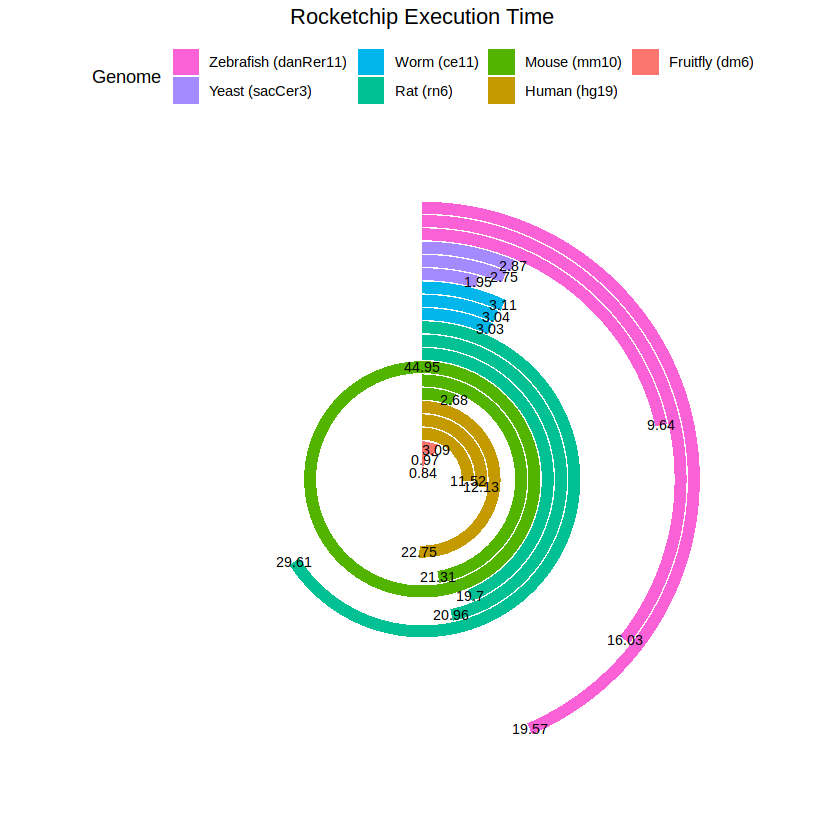

In [55]:
# Organize data and reorder based on Real_Time_Hours within each Genome
data <- data %>%
  arrange(Genome, Real_Time_Hours) %>%  # Arrange by Genome and then by Real_Time_Hours
  mutate(SRA_ID = factor(SRA_ID, levels = SRA_ID))

# Create circular (racetrack) bar plot with rounded labels at the end/top of each bar
plot <- ggplot(data, aes(x = Real_Time_Hours, y = SRA_ID, fill = Genome)) +
  geom_bar(stat = "identity") +
  coord_polar(start = 0) +  # Create a circular plot
  labs(
    x = "Real Time (hours)",
    y = "",
    title = "Rocketchip Execution Time"
  ) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),  # Hide the x-axis labels
    axis.title = element_blank(),  # Hide the x-axis title
    plot.title = element_text(hjust = 0.5),
    panel.grid = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    legend.position = "top"
  )

# Add rounded labels for Real_Time_Hours at the end/top of each bar
plot <- plot + geom_text(
  aes(label = round(Real_Time_Hours, 2)),
  position = position_stack(vjust = 1),  # Position labels at the top
  size = 3
)

# Reverse the order of items in the legend (optional)
plot <- plot + guides(fill = guide_legend(reverse = TRUE))

# Save or display the plot
print(plot)

# Save the plot to a file with specified dimensions
#ggsave("tables_and_figures/run_times_racetrack.pdf", plot, width = 10, height = 10)